# Scikit Image: image processing in python

In [78]:
%matplotlib inline
import os
from IPython.core.display import HTML
def load_style(directory = '../../', name='customMac.css'):  
        styles = open(os.path.join(directory, name), 'r').read()
        return HTML(styles)
load_style()

# Plot Checker board

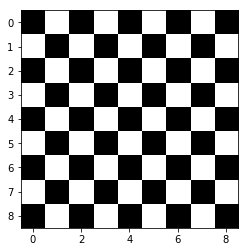

In [6]:
import numpy as np
from matplotlib import pyplot as plt

def plotCheck():
    check = np.zeros((9,9))
    check[::2,1::2] = 1
    check[1::2,::2] = 1
    plt.figure
    plt.imshow(check,cmap = 'gray', interpolation = 'nearest')
    plt.show()
    
plotCheck()    # plot check

# Image Property

Camera datatype =  uint8
Camera Shape =  (512, 512)


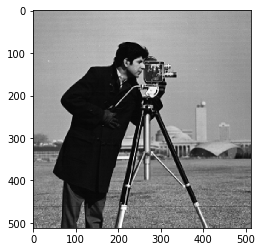

In [11]:
from skimage import data

def imageProperty():
    camera = data.camera()
    print("Camera datatype = ", camera.dtype)
    plt.imshow(camera,cmap = 'gray')
    [row,col] =  camera.shape
    print("Camera Shape = ", camera.shape)

imageProperty()   # image property

# Basic image filters: Gaussian and Sobel

Maximum in Sobel Filter= 0.5915023652179584


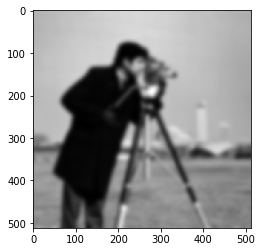

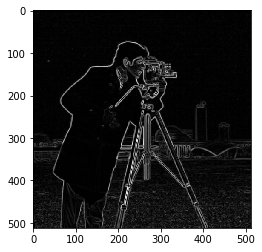

In [26]:
from skimage import filters
from skimage import img_as_float

# skimage convention: float images are supposed to lie
# in [-1, 1] (in order to have comparable contrast for
# all float images)

def imageFilters():
    filtered_camera = filters.gaussian(data.camera(),5)
    plt.figure('Gaussian Filtered Image')
    plt.imshow(filtered_camera,cmap = 'gray')
    cameraFloat = img_as_float(data.camera())
    cameraSobel = filters.sobel(cameraFloat)
    plt.figure('Sobel Image')
    plt.imshow(cameraSobel,cmap = 'gray')
    print('Maximum in Sobel Filter=',cameraSobel.max())

imageFilters()    # basic filters

# Input/output, data types and colorspaces

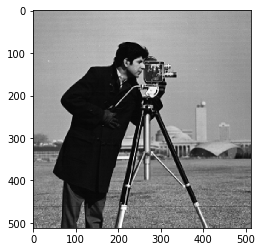

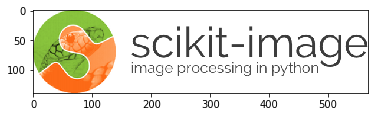

In [27]:
import os
from skimage import io
import skimage

def InputOutput():
    filename = os.path.join(skimage.data_dir,'camera.png')
    camera = io.imread(filename)
    plt.imshow(camera,cmap = 'gray')
    plt.show()
    logo = io.imread('http://scikit-image.org/_static/img/logo.png')
    ganesh = io.imread('https://i2.wp.com/itsevalicious.com/wp-content/uploads/2017/04/Bal-Ganesh-Cartoon-image-hd.jpg?resize=555%2C551')
    io.imsave('logo.png',logo)
    io.imsave('God.png',ganesh)
    plt.imshow(logo,cmap = 'gray')
    plt.show()
    
InputOutput()     #  Input/output

Datatype = uint8


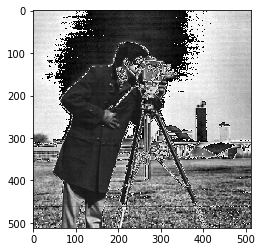

In [31]:
def dataType():
    camera = data.camera()
    print("Datatype =",camera.dtype)
    cameraMultiply = 3* camera
    plt.figure('Mutliply Image')
    plt.imshow(cameraMultiply, cmap = 'gray')
    
dataType()     # data types and colorspaces

In [35]:
# skimage convention: float images are supposed to lie
# in [-1, 1] (in order to have comparable contrast for
# all float images)

def floatImage():
    camera = data.camera()
    cameraFloat =  img_as_float(camera)
    print("Maximum pixel value = ", camera.max())
    print("Minimum pixel value = ", camera.min())
    print("Maximum pixel value in Float = ", cameraFloat.max())
    print("Minimum pixel value in Float = ", cameraFloat.min())

floatImage() 

Maximum pixel value =  255
Minimum pixel value =  0
Maximum pixel value in Float =  1.0
Minimum pixel value in Float =  0.0


size of face image =  (768, 1024, 3)


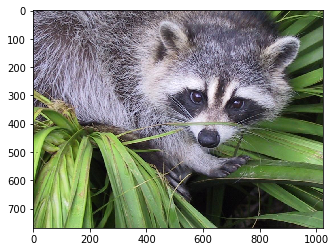

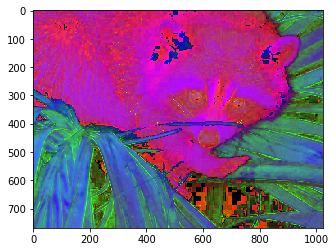

In [40]:
import scipy
from skimage import color

def colorSpaces():
    face = scipy.misc.face()
    print('size of face image = ', face.shape)
    plt.figure('Color Image')
    plt.imshow(face)
    plt.show()
    faceHSV = color.rgb2hsv(face)   # color.lab2rgb
    plt.figure('HSV Image')
    plt.imshow(faceHSV)
    
colorSpaces()

# Otsu's segmenation

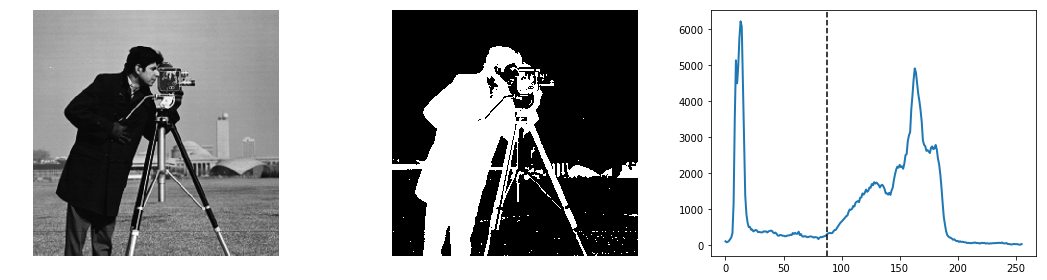

In [47]:
from skimage import exposure

def otsuSegmentation():
    camera = data.camera()
    val = filters.threshold_otsu(camera)
    #mask = camera < val
    
    hist, bins_center = exposure.histogram(camera)
    plt.figure(figsize=(15, 4))
    plt.subplot(131)
    plt.imshow(camera, cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(camera < val, cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.subplot(133)
    plt.plot(bins_center, hist, lw=2)
    plt.axvline(val, color='k', ls='--')

    plt.tight_layout()
    plt.show()

otsuSegmentation()

# Connected Component

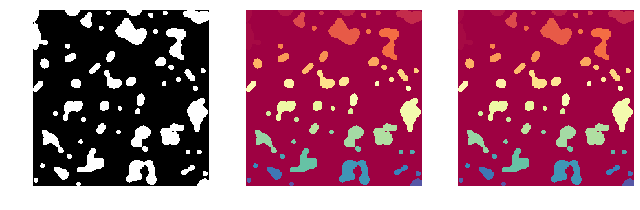

In [54]:
from skimage import measure
from matplotlib import cm

def connComp():
    n = 12
    l = 256
    np.random.seed(1)
    im = np.zeros((l,l))
    points = l*np.random.random((2,n**2))
    im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
    im = filters.gaussian(im, sigma= l / (4. * n))
    blobs = im > 2 * im.mean()
    
    all_labels = measure.label(blobs)
    blobs_labels = measure.label(blobs, background=0)
    
    plt.figure(figsize=(9, 3.5))
    plt.subplot(131)
    plt.imshow(blobs, cmap='gray')
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(all_labels, cmap = cm.get_cmap("Spectral"))
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(blobs_labels, cmap = cm.get_cmap("Spectral"))
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    
connComp()

# Extract Corner Features: Harris Corner Detector

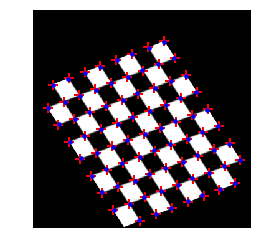

In [60]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform

def featureExt():
    tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.2,
                        translation=(210, 50))
    image = warp(data.checkerboard(), tform.inverse, output_shape=(350, 350))

    coords = corner_peaks(corner_harris(image), min_distance=5)
    coords_subpix = corner_subpix(image, coords, window_size=13)

    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=10, mew=2)
    plt.plot(coords[:, 1], coords[:, 0], '.b', markersize=7)
    plt.axis('off')
    plt.show()
    
featureExt()

# Convex Hull of binary image

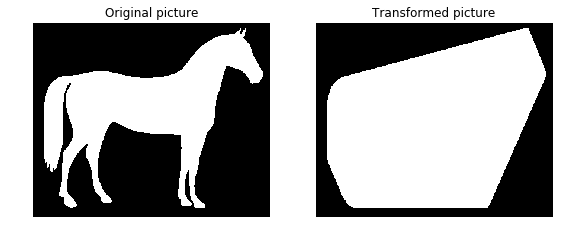

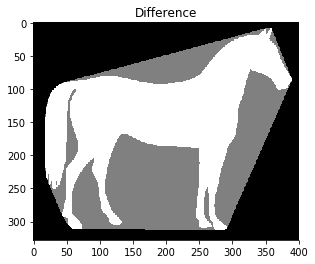

In [64]:
from skimage.util import invert
from skimage.morphology import convex_hull_image

def convexHull():
    # The original image is inverted as the object must be white.
    image = invert(data.horse())

    chull = convex_hull_image(image)

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()

    ax[0].set_title('Original picture')
    ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    ax[0].set_axis_off()

    ax[1].set_title('Transformed picture')
    ax[1].imshow(chull, cmap=plt.cm.gray, interpolation='nearest')
    ax[1].set_axis_off()

    plt.tight_layout()
    plt.show()
    
    chull_diff = img_as_float(chull.copy())
    chull_diff[image] = 2

    fig, ax = plt.subplots()
    ax.imshow(chull_diff, cmap=plt.cm.gray, interpolation='nearest')
    ax.set_title('Difference')
    plt.show()

convexHull()

# Contour Finding

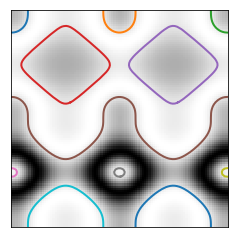

In [65]:
def contourFinding():
    # Construct some test data
    x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
    r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

    # Find contours at a constant value of 0.8
    contours = measure.find_contours(r, 0.8)

    # Display the image and plot all contours found
    fig, ax = plt.subplots()
    ax.imshow(r, interpolation='nearest', cmap=plt.cm.gray)

    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
    
contourFinding()

# Shapes Finding

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


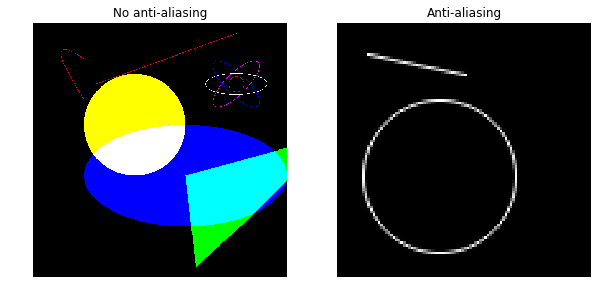

In [70]:
import math
from skimage.draw import (line, polygon, circle,
                          circle_perimeter,
                          ellipse, ellipse_perimeter,
                          bezier_curve)

from skimage.draw import line_aa, circle_perimeter_aa

def shapesFinding():
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))


    img = np.zeros((500, 500, 3), dtype=np.double)

    # draw line
    rr, cc = line(120, 123, 20, 400)
    img[rr, cc, 0] = 255

    # fill polygon
    poly = np.array((
            (300, 300),
            (480, 320),
            (380, 430),
            (220, 590),
            (300, 300),
            ))
    rr, cc = polygon(poly[:, 0], poly[:, 1], img.shape)
    img[rr, cc, 1] = 1

    # fill circle
    rr, cc = circle(200, 200, 100, img.shape)
    img[rr, cc, :] = (1, 1, 0)

    # fill ellipse
    rr, cc = ellipse(300, 300, 100, 200, img.shape)
    img[rr, cc, 2] = 1

    # circle
    rr, cc = circle_perimeter(120, 400, 15)
    img[rr, cc, :] = (1, 0, 0)

    # Bezier curve
    rr, cc = bezier_curve(70, 100, 10, 10, 150, 100, 1)
    img[rr, cc, :] = (1, 0, 0)
    
    # ellipses
    rr, cc = ellipse_perimeter(120, 400, 60, 20, orientation=math.pi / 4.)
    img[rr, cc, :] = (1, 0, 1)
    rr, cc = ellipse_perimeter(120, 400, 60, 20, orientation=-math.pi / 4.)
    img[rr, cc, :] = (0, 0, 1)
    rr, cc = ellipse_perimeter(120, 400, 60, 20, orientation=math.pi / 2.)
    img[rr, cc, :] = (1, 1, 1)
    
    ax1.imshow(img)
    ax1.set_title('No anti-aliasing')
    ax1.axis('off')

    img = np.zeros((100, 100), dtype=np.double)

    # anti-aliased line
    rr, cc, val = line_aa(12, 12, 20, 50)
    img[rr, cc] = val
    
    # anti-aliased circle
    rr, cc, val = circle_perimeter_aa(60, 40, 30)
    img[rr, cc] = val
    
    
    ax2.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
    ax2.set_title('Anti-aliasing')
    ax2.axis('off')

    plt.show()

shapesFinding()

# Hough Transform

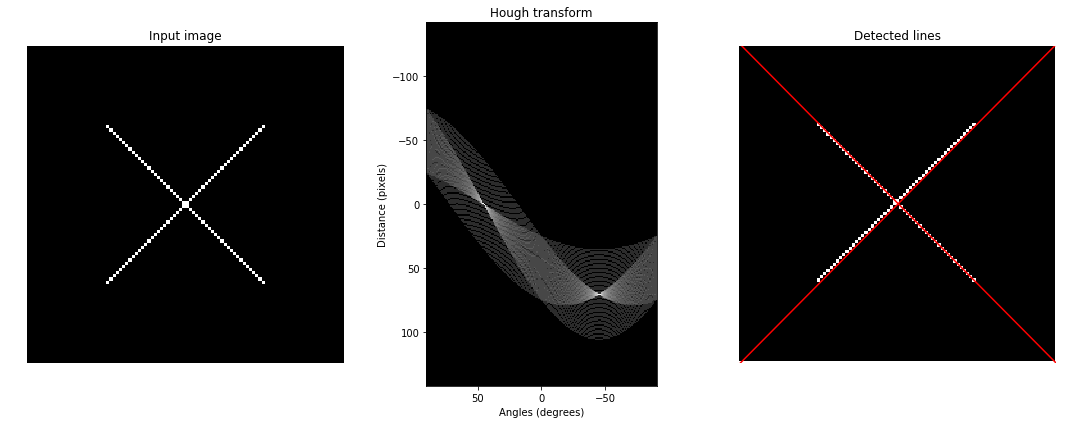

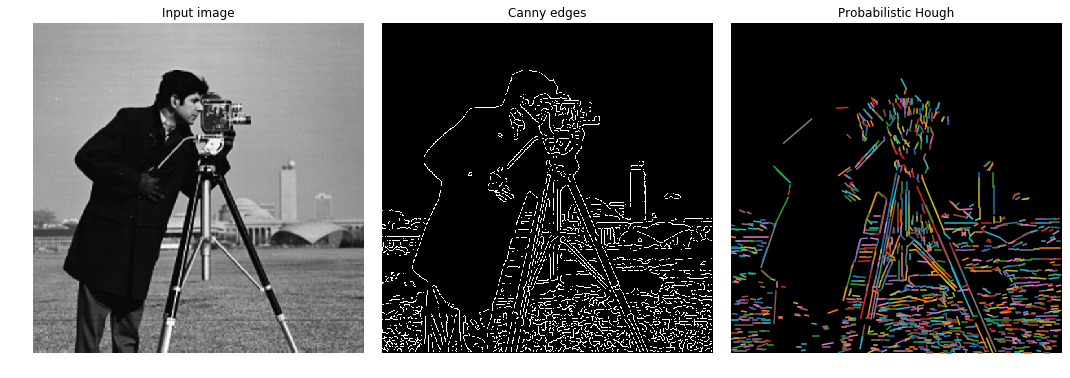

In [75]:
from skimage.feature import canny
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)

def houghTransform():
    # Constructing test image
    image = np.zeros((100, 100))
    idx = np.arange(25, 75)
    image[idx[::-1], idx] = 255
    image[idx, idx] = 255

    # Classic straight-line Hough transform
    h, theta, d = hough_line(image)

    # Generating figure 1
    fig, axes = plt.subplots(1, 3, figsize=(15, 6),
                             subplot_kw={'adjustable': 'box-forced'})
    ax = axes.ravel()

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_axis_off()
    
    ax[1].imshow(np.log(1 + h),
                 extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
                 cmap=cm.gray, aspect=1/1.5)
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    ax[2].imshow(image, cmap=cm.gray)
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
        ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
        ax[2].set_xlim((0, image.shape[1]))
        ax[2].set_ylim((image.shape[0], 0))
        ax[2].set_axis_off()
        ax[2].set_title('Detected lines')
        
    plt.tight_layout()
    plt.show()

    # Line finding using the Probabilistic Hough Transform
    image = data.camera()
    edges = canny(image, 2, 1, 25)
    lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

    # Generating figure 2
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')

    ax[1].imshow(edges, cmap=cm.gray)
    ax[1].set_title('Canny edges')

    ax[2].imshow(edges * 0)
    for line in lines:
        p0, p1 = line
        ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
        ax[2].set_xlim((0, image.shape[1]))
        ax[2].set_ylim((image.shape[0], 0))
        ax[2].set_title('Probabilistic Hough')
        
    for a in ax:
        a.set_axis_off()
        a.set_adjustable('box-forced')

    plt.tight_layout()
    plt.show()

houghTransform()

Number of coordinates: 22 704 26
Number of coordinates: 1173 32 9
Number of coordinates: 701 21 5


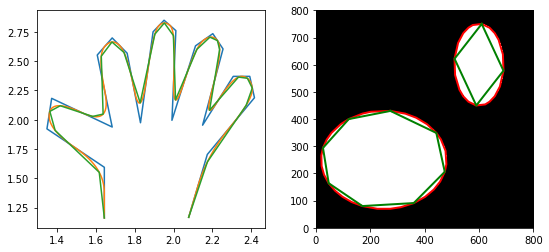

In [77]:
from skimage.measure import find_contours, approximate_polygon,subdivide_polygon

def appxPolygon():
    hand = np.array([[1.64516129, 1.16145833],
                 [1.64516129, 1.59375],
                 [1.35080645, 1.921875],
                 [1.375, 2.18229167],
                 [1.68548387, 1.9375],
                 [1.60887097, 2.55208333],
                 [1.68548387, 2.69791667],
                 [1.76209677, 2.56770833],
                 [1.83064516, 1.97395833],
                 [1.89516129, 2.75],
                 [1.9516129, 2.84895833],
                 [2.01209677, 2.76041667],
                 [1.99193548, 1.99479167],
                 [2.11290323, 2.63020833],
                 [2.2016129, 2.734375],
                 [2.25403226, 2.60416667],
                 [2.14919355, 1.953125],
                 [2.30645161, 2.36979167],
                 [2.39112903, 2.36979167],
                 [2.41532258, 2.1875],
                 [2.1733871, 1.703125],
                 [2.07782258, 1.16666667]])

    # subdivide polygon using 2nd degree B-Splines
    new_hand = hand.copy()
    for _ in range(5):
        new_hand = subdivide_polygon(new_hand, degree=2, preserve_ends=True)
        
    # approximate subdivided polygon with Douglas-Peucker algorithm
    appr_hand = approximate_polygon(new_hand, tolerance=0.02)

    print("Number of coordinates:", len(hand), len(new_hand), len(appr_hand))

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4))

    ax1.plot(hand[:, 0], hand[:, 1])
    ax1.plot(new_hand[:, 0], new_hand[:, 1])
    ax1.plot(appr_hand[:, 0], appr_hand[:, 1])


    # create two ellipses in image
    img = np.zeros((800, 800), 'int32')
    rr, cc = ellipse(250, 250, 180, 230, img.shape)
    img[rr, cc] = 1
    rr, cc = ellipse(600, 600, 150, 90, img.shape)
    img[rr, cc] = 1

    plt.gray()
    ax2.imshow(img)

    # approximate / simplify coordinates of the two ellipses
    for contour in find_contours(img, 0):
        coords = approximate_polygon(contour, tolerance=2.5)
        ax2.plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
        coords2 = approximate_polygon(contour, tolerance=39.5)
        ax2.plot(coords2[:, 1], coords2[:, 0], '-g', linewidth=2)
        print("Number of coordinates:", len(contour), len(coords), len(coords2))

    ax2.axis((0, 800, 0, 800))

    plt.show()

appxPolygon()